# Initializing the Data

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
import operator

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

# To calculate the accuracy score of the model
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
#reads in the file and merge both files
df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [117]:
df1.columns = ['id','title','cast','crew']

In [118]:
df2 = df2.merge(df1,on='id')

In [119]:
# checks that everything merged correctly
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Dealing with Missing Data

In [120]:
#checks for missing value and percentage of the data missing
df2.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [121]:
# checks the ratio of nulls to all columns. Homepage has 64% nulls, going to drop column. Not important to our analysis anyways.
df2.isnull().sum()/len(df2)

budget                  0.000000
genres                  0.000000
homepage                0.643556
id                      0.000000
keywords                0.000000
original_language       0.000000
original_title          0.000000
overview                0.000625
popularity              0.000000
production_companies    0.000000
production_countries    0.000000
release_date            0.000208
revenue                 0.000000
runtime                 0.000416
spoken_languages        0.000000
status                  0.000000
tagline                 0.175724
title_x                 0.000000
vote_average            0.000000
vote_count              0.000000
title_y                 0.000000
cast                    0.000000
crew                    0.000000
dtype: float64

In [122]:
# drops homepage column 
df2 = df2[df2.columns.drop('homepage')]

In [123]:
# shows general statistics of our data
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a105d8cf8>,
      dtype=object)

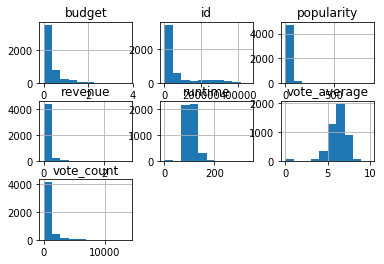

In [124]:
# gives us an idea of how the column values are distributed
df2.hist()

In [125]:
# checks how many nulls are in other columns
df2.isnull().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
title_x                   0
vote_average              0
vote_count                0
title_y                   0
cast                      0
crew                      0
dtype: int64

In [126]:
# replaces null values

#fills in "no tagline" for missing taglines
df2['tagline'].fillna('No tagline', inplace=True)
#fills in "empty" for missing overview
df2['overview'].fillna('empty', inplace=True)
#fills in "not recorded" for missing released date
df2['release_date'].fillna('Not recorded', inplace=True)
#fills in average value for missing runtime
df2['runtime'].fillna(df2["runtime"].mean(), inplace=True)

In [127]:
#makes sure no null values are left
df2.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64

In [128]:
df2.budget = df2.budget.replace(0, None)

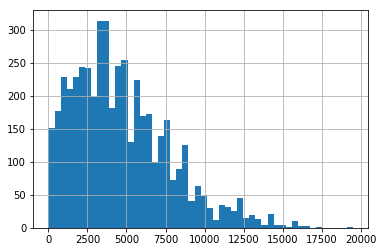

In [129]:
sqrt_transformed_budget = df2["budget"].apply(np.sqrt) # Get the square root of data points*
sqrt_transformed_budget.hist(bins=50) # Plot histogram
df2.budget = sqrt_transformed_budget

In [130]:
df2.popularity = df2.popularity.replace(0, None)

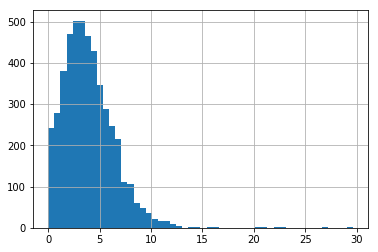

In [131]:
sqrt_transformed_popularity = df2["popularity"].apply(np.sqrt) # Get the square root of data points*
sqrt_transformed_popularity.hist(bins=50) # Plot histogram
df2.popularity = sqrt_transformed_popularity

In [132]:
df2.revenue = df2.revenue.replace(0, None)

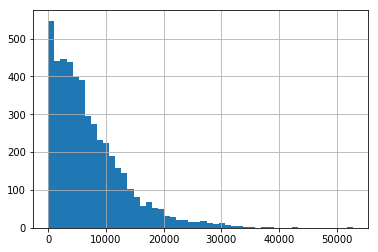

In [133]:
sqrt_transformed_revenue = df2["revenue"].apply(np.sqrt) # Get the square root of data points*
sqrt_transformed_revenue.hist(bins=50) # Plot histogram
df2.revenue = sqrt_transformed_revenue

# Visualization and Analysis

In [134]:
# looks for correlations between variables
df2.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.146879,0.604257,0.739703,0.309038,0.104326,0.531074
id,-0.146879,1.000000,-0.063552,-0.100414,-0.153006,-0.270595,-0.004128
popularity,0.604257,-0.063552,1.000000,0.725849,0.294439,0.388820,0.791085
revenue,0.739703,-0.100414,0.725849,1.000000,0.272413,0.224490,0.723038
runtime,0.309038,-0.153006,0.294439,0.272413,1.000000,0.373989,0.271927
vote_average,0.104326,-0.270595,0.388820,0.224490,0.373989,1.000000,0.312997
vote_count,0.531074,-0.004128,0.791085,0.723038,0.271927,0.312997,1.000000


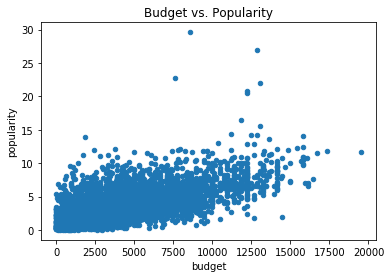

In [135]:
df2.plot(kind='scatter', x='budget', y='popularity', title="Budget vs. Popularity")

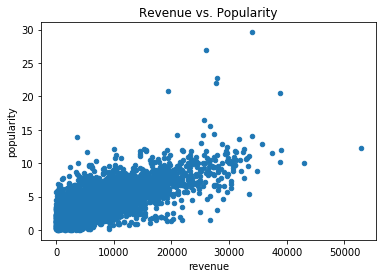

In [136]:
df2.plot(kind='scatter', x='revenue', y='popularity', title="Revenue vs. Popularity")

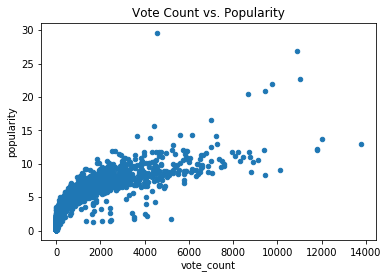

In [137]:
df2.plot(kind='scatter', x='vote_count', y='popularity', title="Vote Count vs. Popularity")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a107e2ac8>,
      dtype=object)

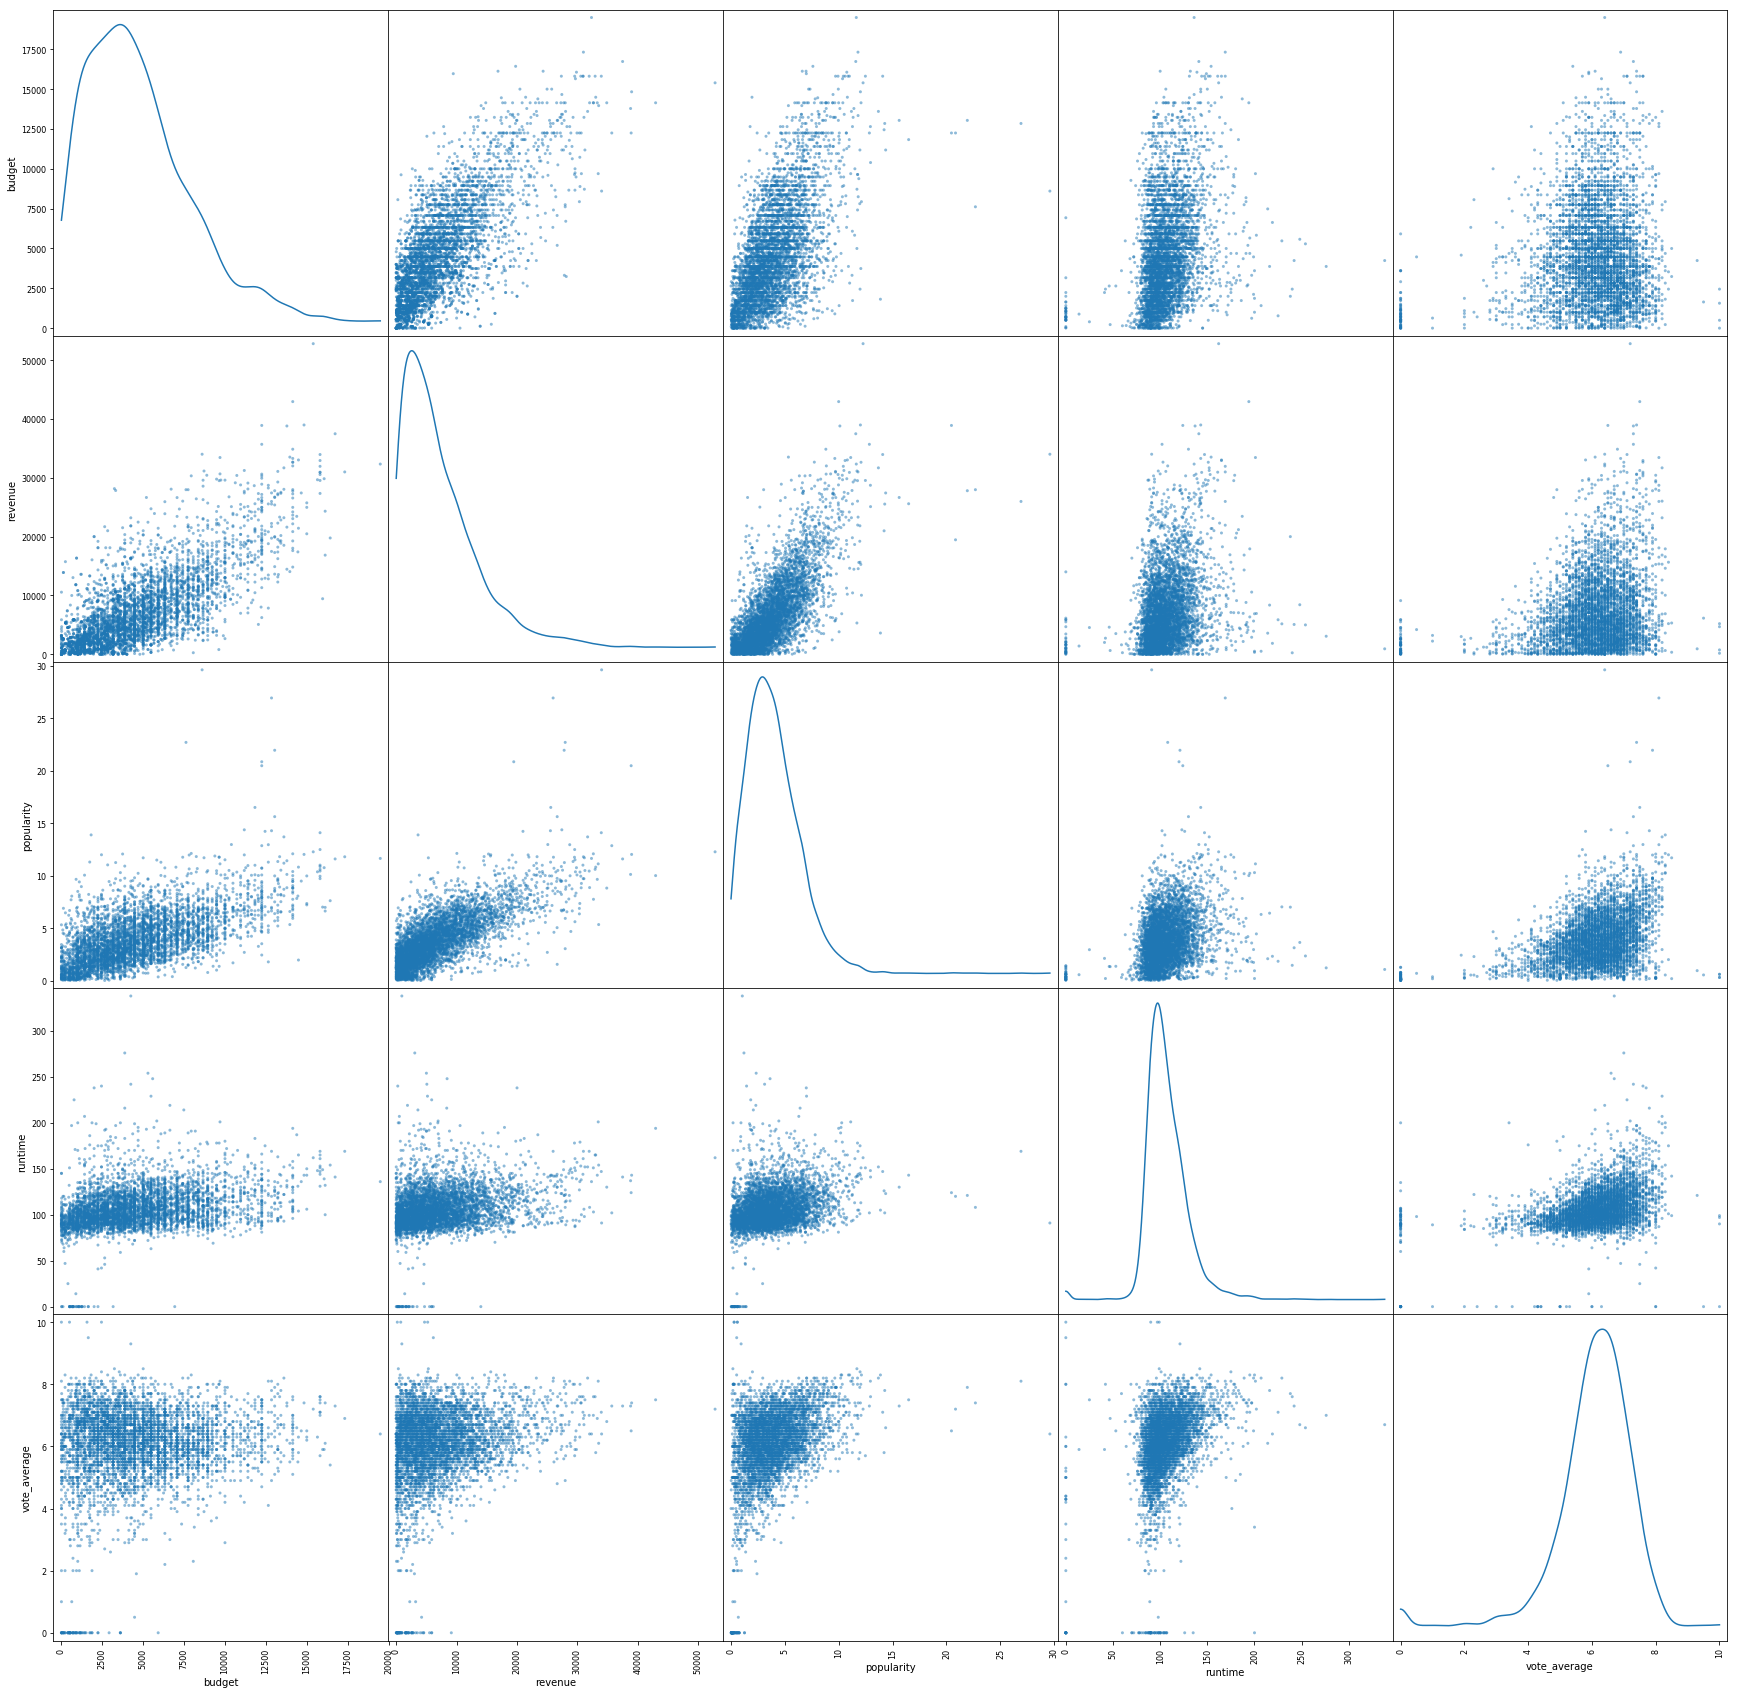

In [138]:
# shows scatter plots between all continuous variables
from pandas.plotting import scatter_matrix
scatter_matrix(df2[['budget', 'revenue', 'popularity', 'runtime', 'vote_average']], # Make a scatter matrix of all columns
               figsize=(30, 30), # Set plot size
               diagonal='kde')  # Show distribution estimates on diagonal

# Training Predictive Models

## PCA

In [139]:
from sklearn.decomposition import PCA
X_pca = df2[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']]
y_pca = df2[['popularity']]
pca = PCA(n_components=3)

In [140]:
# Shows the explained variance for each of the 3 components
fit = pca.fit(X_pca)
print("Explained Variance:", fit.explained_variance_ratio_)
print("Components: ")

Explained Variance: [0.90918648 0.0765246  0.01427978]
Components: 


In [141]:
# Convert principal components into a dataframe
principalComponents = pca.fit_transform(X_pca)
pca_df = pd.DataFrame(data=principalComponents, columns=['component1','component2', 'component3'])
pca_df.head()

,component1,component2,component3
0,47339.169503,-7644.070483,4295.213878
1,27090.187315,2697.111131,380.094369
2,25245.309337,1642.215778,520.694125
3,28917.506270,261.464462,4620.195543
4,13351.264708,6974.950530,137.025575


In [142]:
print("Original dataframe shape: ")
print(df2.shape)
print("PCA dataframe shape: ")
print(pca_df.shape)

Original dataframe shape: 
(4803, 22)
PCA dataframe shape: 
(4803, 3)


In [143]:
from sklearn.preprocessing import LabelEncoder
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [144]:
# Encode Labels
features = pca_df[['component1','component2', 'component3']]

label_encode(features, features.columns.values)

target = df2[['popularity']]
label_encode(target, target.columns.values)

/Users/zachb8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [145]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 10)

In [146]:
# Train Model
# Now we train our LinearRegression model using the training subset of data.

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
for idx, col_name in enumerate(features_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for component1 is 0.941845240108576
The coefficient for component2 is -0.03904436067178563
The coefficient for component3 is 0.48611115639863245


In [148]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -937.463814820766


In [149]:
# Accuracy Score                        
from sklearn import metrics
regression_model.score(features_test, target_test)

0.7245401504099074

In [150]:
# MSE Score
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(features_test)

regression_model_mse = mean_squared_error(y_predict, target_test)

regression_model_mse

538050.524933973

In [151]:
# RMSE Score
import math

math.sqrt(regression_model_mse)

733.5192737303996

## Regression Model Training

In [152]:
#Acurracy score budget vs popularity
temp = df2[['budget','popularity']]
x = df2[['budget']]
y = df2[['popularity']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
bp = regression_model.score(x_test, y_test)

In [153]:
#Acurracy score revenue vs popularity
temp1 = df2[['revenue','popularity']]
x = df2[['revenue']]
y = df2[['popularity']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
rp = regression_model.score(x_test, y_test)

In [155]:
#runtime vs popularity
temp2 = df2[['runtime','popularity']]
x = df2[['runtime']]
y = df2[['popularity']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
rtp = regression_model.score(x_test, y_test)

In [156]:
#vote_average vs popularity
temp3 = df2[['vote_average','popularity']]
x = df2[['vote_average']]
y = df2[['popularity']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
vap = regression_model.score(x_test, y_test)

In [157]:
#vote count vs popularity
temp4 = df2[['vote_count','popularity']]
x = df2[['vote_count']]
y = df2[['popularity']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
vcp = regression_model.score(x_test, y_test)

In [158]:
print("Vote Count vs. Popularity Accuracy: " + str(vcp*100) + "%")
print("Revenue vs. Popularity Accuracy: " + str(rp*100) + "%")
print("Budget vs. Popularity Accuracy: " + str(bp*100) + "%")
print("Vote Average vs. Popularity Accuracy: " + str(vap*100) + "%")
print("Runtime vs. Popularity Accuracy: " + str(rtp*100) + "%")

Vote Count vs. Popularity Accuracy: 66.64961563100975%
Revenue vs. Popularity Accuracy: 56.46783829955715%
Budget vs. Popularity Accuracy: 39.89705932085932%
Vote Average vs. Popularity Accuracy: 16.5209447660426%
Runtime vs. Popularity Accuracy: 11.719322392703202%
